<a href="https://colab.research.google.com/github/prashantiyaramareddy/AI-ML-Learnings/blob/master/ComputerVision/Linear_NN_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **Linear Neural Network (LNN)** is the simplest type of neural network. When applied to images, it functions essentially as a high-dimensional linear regression model. Unlike modern architectures like Convolutional Neural Networks (CNNs), an LNN treats an image as a flat list of numbers rather than a structured grid.

### How it Works for Images

To process an image with a linear neural network, the 2D grid of pixels (width  height) must first be **flattened** into a 1D vector.

1. **Flattening:** An image of  pixels becomes a single vector of  values.
2. **Weighted Sum:** Each pixel value  is multiplied by a weight .
3. **Output:** The network calculates the sum:

 (where  is the bias).
4. **No Hidden Complexity:** In a strictly *linear* network, there are no non-linear activation functions (like ReLU or Sigmoid). This means that even if you stack multiple layers, the entire network mathematically collapses into a single linear transformation.

---

### Why LNNs are Rarely Used for Images

While LNNs are computationally "cheap," they are generally ineffective for modern computer vision for several reasons:

| Feature | Linear Neural Network | Convolutional Neural Network (CNN) |
| --- | --- | --- |
| **Spatial Structure** | Lost (image is flattened). | Preserved (uses 2D filters). |
| **Parameters** | Huge (every pixel connected to every output). | Small (weights are shared across the image). |
| **Translation** | **Vulnerable:** If an object moves 1 pixel, the network may fail. | **Invariant:** Can find a "cat" anywhere in the frame. |
| **Complexity** | Can only learn linear relationships. | Can learn complex features (eyes, wheels, textures). |

### Limitations in "Linearity"

The biggest drawback is the lack of **non-linearity**. Because the network only performs basic addition and multiplication, it can only separate data that is "linearly separable" (meaning you could draw a straight line or plane between classes).

> **Example:** A linear network might be able to tell if an image is "mostly dark" or "mostly light," but it would struggle to distinguish between a "3" and an "8" because the pixel patterns overlap in complex, non-linear ways.

---

### Modern Context

Today, "Linear Layers" (also called **Fully Connected** or **Dense** layers) are still used in image processing, but almost always at the **very end** of a network. The CNN does the hard work of extracting features, and the Linear Layer makes the final classification based on those features.

Would you like me to show you a code example of how to define a simple linear layer for image classification in PyTorch or TensorFlow?

[Neural Networks Explained](https://www.youtube.com/watch?v=jmmW0F0biz0)
This video provides a foundational overview of how neural networks process information and make decisions, which is helpful for understanding the basic mechanics of linear layers.

### Shallow Neural Network implementation

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Function to read CSV FILE

In [5]:
def readanddecode(filename, resize_dims):
  # 1. Read the raw file
  img_bytes = tf.io.read_file(filename)

  # 2. Convert to tensor
  img_tensor = tf.io.decode_jpeg(img_bytes, channels=IMG_CHANNELS)

  # 3. Convert pixels to floats
  img_tensor = tf.image.convert_image_dtype(img_tensor, tf.float32)

  # 4. Resize the image
  img = tf.image.resize(img_tensor, resize_dims)

  return img


In [6]:
from os import read
def parse_csvline(csv_line):
  # record defaults specify the datatypes for each column
  record_default = ["", ""]
  filename, label_string = tf.io.decode_csv(csv_line, record_default)

  # Load the image
  img = readanddecode(filename,[IMG_HEIGHT, IMG_WIDTH])

  # Convert the label string to integer based on the CLASSNAMES index
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))

  return img, label

  return img, label

In [7]:
# Define Datasets
train_dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv").map(parse_csvline,num_parallel_calls=tf.data.AUTOTUNE).batch(16).prefetch(tf.data.AUTOTUNE)

eval_dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv").map(parse_csvline,num_parallel_calls=tf.data.AUTOTUNE).batch(16).prefetch(tf.data.AUTOTUNE)

In [8]:
for image_batch, label_batch in train_dataset.take(3):
  print("Image batch shape",image_batch.shape)
  print("Label Batch Shape", label_batch.shape)
  print("Labels", label_batch.numpy())

Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]
Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [0 3 2 1 0 4 2 0 2 2 1 3 3 2 1 0]
Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [3 1 1 1 1 0 1 2 4 3 3 2 0 1 4 0]


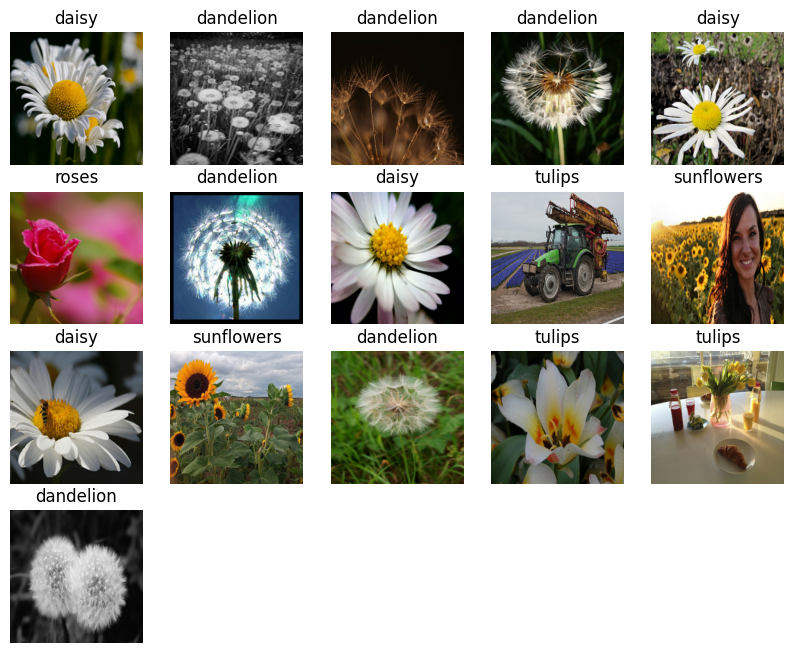

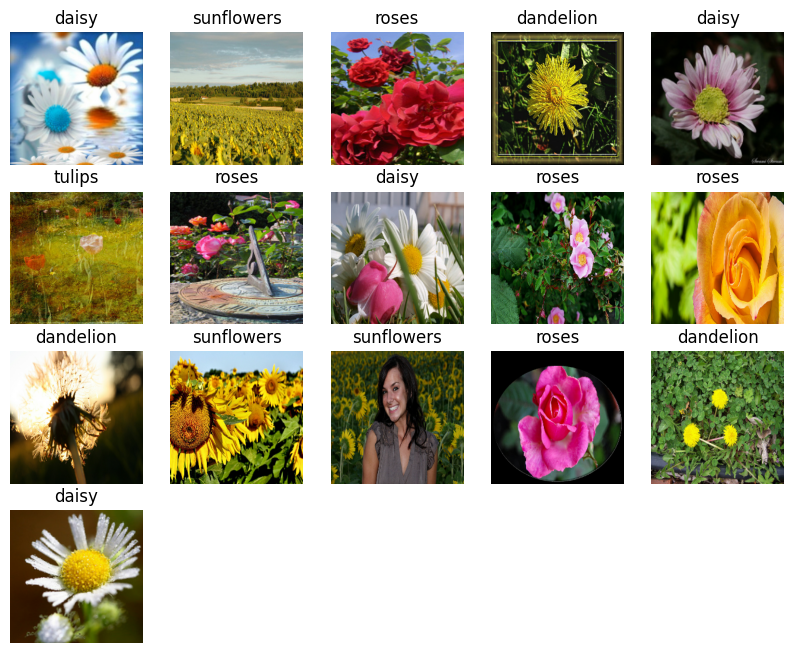

In [9]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train_dataset.take(2):
  plt.figure(figsize=(10,10))
  for n in range(image_batch.shape[0]): # Iterate up to the actual batch size
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]])
    plt.axis("off")

  plt.show()

In [10]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
EPOCHS = 10
history = model.fit(
    train_dataset,
    validation_data=eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
    207/Unknown 144s 682ms/step - accuracy: 0.3109 - loss: 14.8463

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 162s 768ms/step - accuracy: 0.3111 - loss: 14.8333 - val_accuracy: 0.3378 - val_loss: 12.5220
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 147s 710ms/step - accuracy: 0.4246 - loss: 9.4379 - val_accuracy: 0.3514 - val_loss: 14.7660
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 104s 502ms/step - accuracy: 0.4590 - loss: 10.5017 - val_accuracy: 0.3135 - val_loss: 23.7171
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 88s 427ms/step - accuracy: 0.4635 - loss: 11.5525 - val_accuracy: 0.4162 - val_loss: 16.5043
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 91s 437ms/step - accuracy: 0.5020 - loss: 10.6478 - val_accuracy: 0.3973 - val_loss: 19.7997
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 96s 462ms/step - accuracy: 0.5150 - loss: 10.9570 - val_accuracy: 0.4189 - val_loss: 13.2378
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 105s 507ms/step - accuracy: 0.5281 - loss: 10.8251 - val_accuracy: 0.4216 - val_loss: 13.3992
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 104s 505ms/step - accuracy: 0.5520 - 

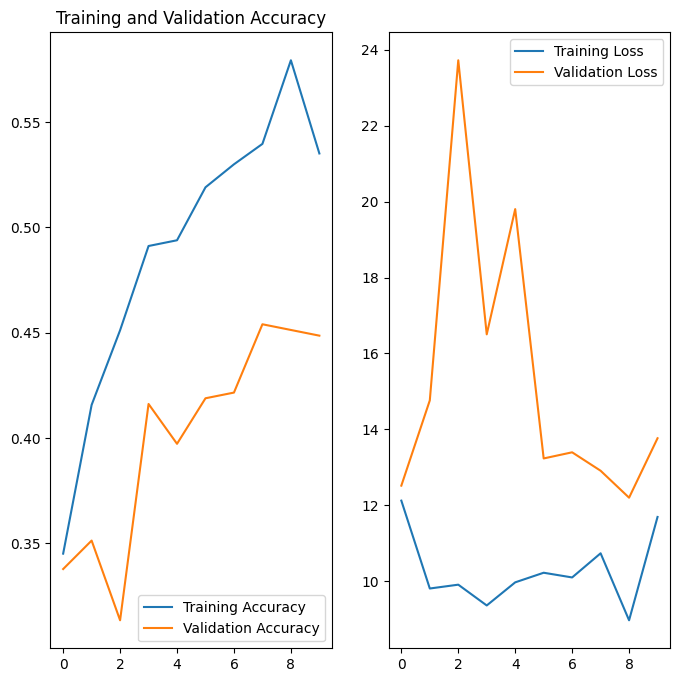

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


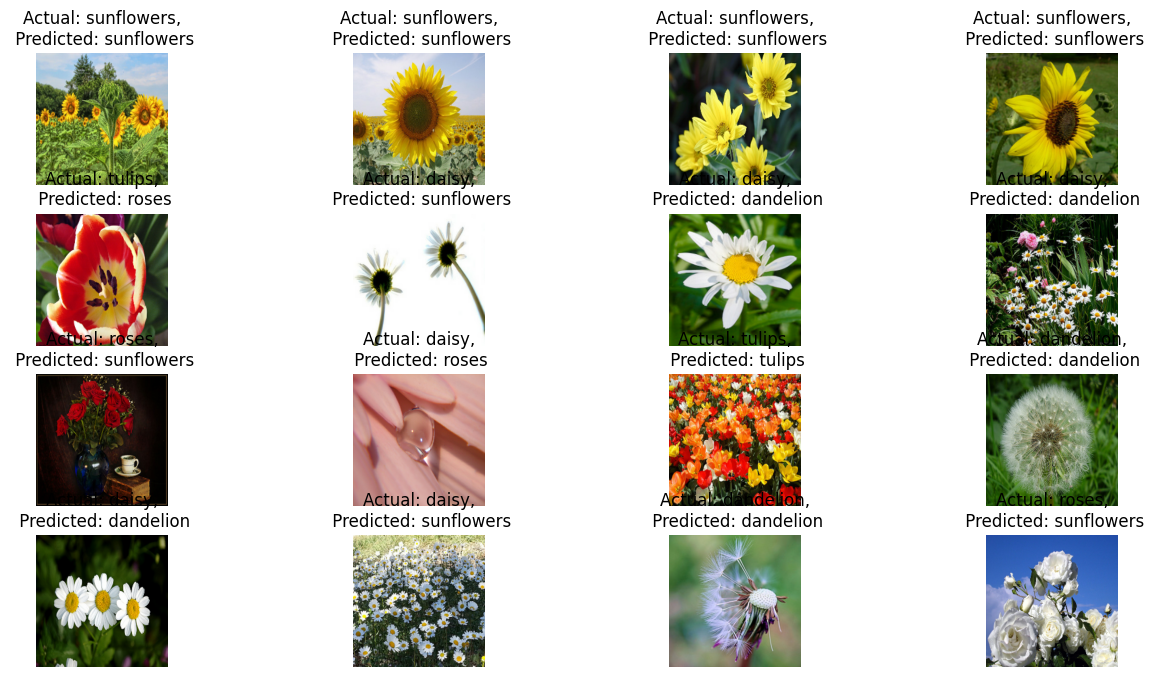

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Get the class names
for images, labels in eval_dataset.take(1):
  # Get model predictions to this batch
  batch_predictions = model.predict(images)
  predicted_indices = tf.argmax(batch_predictions, axis=1)

  # Number of images in this batch
  num_images = images.shape[0]

  # Configure how many images to display per row
  num_cols = 4
  num_rows = math.ceil(num_images/num_cols)

  # Create a figure to display the images
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))

  for i in range(num_images):
   plt.subplot(num_rows, 2*num_cols, 2*i+1)
   plt.imshow(images[i])
   plt.title(CLASS_NAMES[labels[i]])
   plt.axis("off")

   pred_class = CLASS_NAMES[predicted_indices[i]]
   actual_class = CLASS_NAMES[labels[i]]

   plt.title(f"Actual: {actual_class},\n Predicted: {pred_class}")
   plt.axis("off")


  plt.show()

